<a href="https://colab.research.google.com/github/unisttt/open-implementation/blob/master/probrem1_traditional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

In [17]:
def createDataset():
  np.random.seed(111)
  n = 200
  x = 3 * (np.random.rand(n, 4) - 0.5)
  y = (2 * x[:, 0] - 1 * x[:, 1] + 0.5 + 0.5 * np.random.randn(n)) > 0
#   y = 2 * y -1  # y: {-1, 1}
  y = y + 1 -1    # y: {0, 1}
  y.shape = (y.size, 1)
  
  return x, y

X, y = createDataset()
m, n = np.shape(X)
print(X[:3])
print(y[:3])

[[ 0.33651053 -0.99279074 -0.19182294  0.80778742]
 [-0.61402409 -1.05251113 -1.43256503 -0.23932652]
 [-0.78395358 -0.48703142  1.47213739 -0.78682064]]
[[1]
 [1]
 [0]]


In [18]:
# x = np.hstack((np.ones((m, 1)), x))
X = np.append(np.ones((m, 1)), X, axis=1)
m, n = np.shape(X)
print(X[:3])
print("({}, {})".format(m, n))
print(np.shape(y))

[[ 1.          0.33651053 -0.99279074 -0.19182294  0.80778742]
 [ 1.         -0.61402409 -1.05251113 -1.43256503 -0.23932652]
 [ 1.         -0.78395358 -0.48703142  1.47213739 -0.78682064]]
(200, 5)
(200, 1)


In [0]:
def sigmoid(x):
  return (1 / (1 + np.exp(-x)))

In [0]:
def costFunctionReg(theta, X, y, lam):
  m = len(y)
  J = 0
  grad = np.zeros(np.shape(theta))
  
  h_theta = sigmoid(np.dot(X, theta))
  pred1 = np.dot(-y.T, np.log(h_theta))
  pred0 = np.dot(-(1 - y).T, np.log(1 - h_theta))
  # theta0はregularizeしないように注意する
  norm = (lam / (2 * m)) * np.dot(theta[1:].T, theta[1:])
  
  J = (1/m) * (pred1 + pred0) + norm
  J.shape = (J.size)    # (1, 1) => (1,)
  
  # X[:, 0] は全て1の列
  grad0 = (1/m) * np.dot(X[:, 0].T, (h_theta - y))
  grad_other = (1/m) * np.dot(X[:, 1:].T, (h_theta - y)) + (lam / m) * theta[1:]
  grad = np.append(grad0, grad_other)
  grad.shape = (grad.size, 1)    # (5,) => (5, 1)
  
  return J, grad

In [0]:
theta = np.random.randn(n, 1)
epoch = 1000
lr = 0.1
cost_hist = np.array([])

for t in range(epoch):
  cost, grad = costFunctionReg(theta, X, y, 1)
  cost_hist = np.append(cost_hist, cost)
  theta -= lr * grad

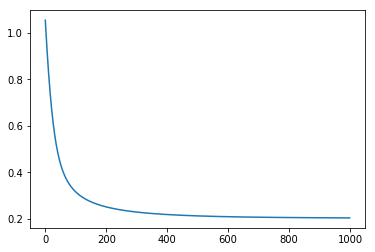

In [22]:
 plt.plot(range(len(cost_hist)), cost_hist)